# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# Introduction

Pens & Printers recently launched a new line of office stationery designed to foster creativity and enhance brainstorming capabilities. To optimise the sales approach for this product line, we tested three different sales strategies: email, phone call, and a combination of both. The purpose of this analysis is to evaluate the effectiveness of these sales methods and provide insights to inform the sales strategy moving forward.

This report will detail the data validation and cleaning process, present the results of the exploratory data analysis, define a metric for the business to monitor, and provide recommendations based on the findings. By leveraging data-driven insights, we can make more informed decisions to improve sales performance and ensure the success of the new product line.

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The original dataset has 15000 rows and 8 columns.
- The **week** column contains integer values from 1-6 corresponding to each week and 0 null values. No changes to this column were necessary.
- The **sales_method** column contains 5 different unique values **(Email, Call, Email + Call, em + call, email)** and 0 null values. The column should only contain 3 unique values corresponding to each type of sales method. Upon inspection of the values in this column, simple mistakes such as different capitalization and use of abbreviations created two extra sets of values. Changes were made, and after cleaning data, the column only contains the following 3 different value types corresponding to each alternate sales method: **Email**, **Call**, **Email + Call**.
- The **customer_id** column contains unique identifiers for each customer and has no missing values. No changes to this column were required.
- The **revenue** column had 1074 missing values. We decided that the best approach to handle these missing values would be to replace them with the average revenue corresponding to each type of sales_method.
- The **years_as_customer** column has 0 missing values; however we had 2 rows with invalid values. Since our company was founded in 1984, the maximum number of years we could have had any given customer is 41. Two rows had values of 47 and 63, which we know is not possible. We assume this was just a mistake in data entry, and will replace these two values with 41.
- The **nb_site_visits** column has 0 missing values, and all data is valid. No changes needed to be made to this column.
- The **state** The column has 0 missing values and 50 unique values corresponding to each state. No changes need to be made to this column.

After cleaning and validating the data, our dataset contains **15000** rows and **8** columns with **0** missing values.

In [2]:
sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
sales.shape

(15000, 8)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [6]:
print(sales['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


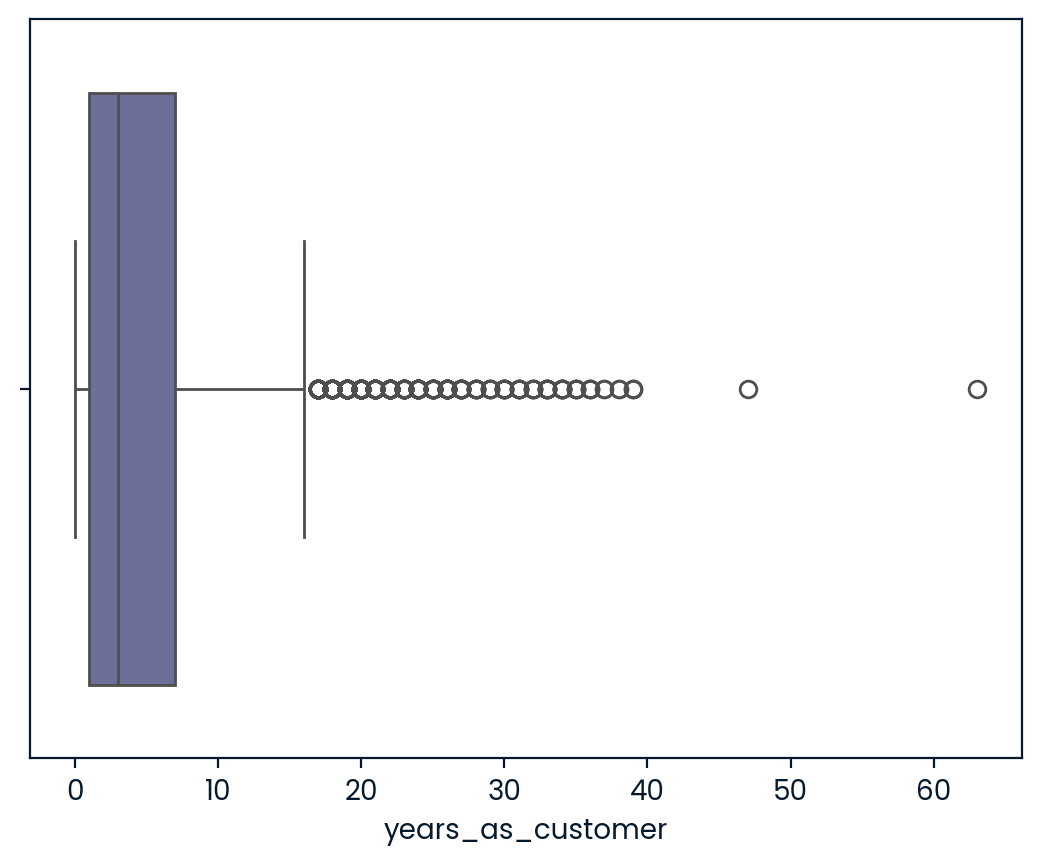

In [7]:
sns.boxplot(x='years_as_customer', data=sales)
plt.show()

In [8]:
# Check Outlier Data in 'years_as_customers' since the maximum value is 41 based on the year the company was founded
sales[sales['years_as_customer'] > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [9]:
# Replace outlier value with the 41
sales.loc[sales['years_as_customer'] > 41, 'years_as_customer'] = 41 

In [10]:
# Check 'years_as_customer' column after replace outlier value
sales[sales['years_as_customer'] > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [11]:
# Remapping 'sales_method' into 3 unique value of 'sales_method'
remapping_method = {
    'Email' : 'Email',
    'Call' : 'Call',
    'Email + Call' : 'Email + Call',
    'em + call' : 'Email + Call',
    'email' : 'Email'
}

sales['sales_method'] = sales['sales_method'].map(remapping_method)
sales['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [12]:
# Fill null revenue in 'revenue' with mean value of each sales_method
mean_revenue_by_method = sales.groupby('sales_method')['revenue'].mean()

def replace_null_revenue(row):
    if pd.isnull(row['revenue']):
        return mean_revenue_by_method[row['sales_method']]
    else:
        return row['revenue']

sales['revenue'] = sales.apply(replace_null_revenue, axis=1)
print(sales['revenue'].isnull().sum())

0


In [13]:
# Check how many unique value in 'state'
sales['state'].nunique()

50

# Data Validation

In [14]:
# Check data after cleaning data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [15]:
# Check statistical data after cleaning data
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,95.578993,4.964067,24.990867
std,1.656420,1.812213,47.956792,5.028153,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.650000,1.000000,23.000000
50%,3.000000,10.000000,90.950000,3.000000,25.000000
75%,5.000000,11.000000,107.750000,7.000000,27.000000
max,6.000000,16.000000,238.320000,41.000000,41.000000


In [16]:
# Check Sales Method Unique Value After Remapping Data
print(sales['sales_method'].unique())

['Email' 'Email + Call' 'Call']


No duplicated data after cleaning the data

In [17]:
# Check duplicated data after cleaning data
sales[sales.duplicated()]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


# Outcomes

## Number of Customers per Methods

There are a total **15000** customers who have been approached during the six-week sales. The method used during those periods consists of: Email, Call, Email + Call. In detail, **7466** customers have been approached using Email, **4962** customers approached using Call, and **2572** customers approached using Email + Call.

In [18]:
# Calculate Total Customers by Sales Method
num_cust_by_sales_method = sales['sales_method'].value_counts()
num_cust_by_sales_method

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

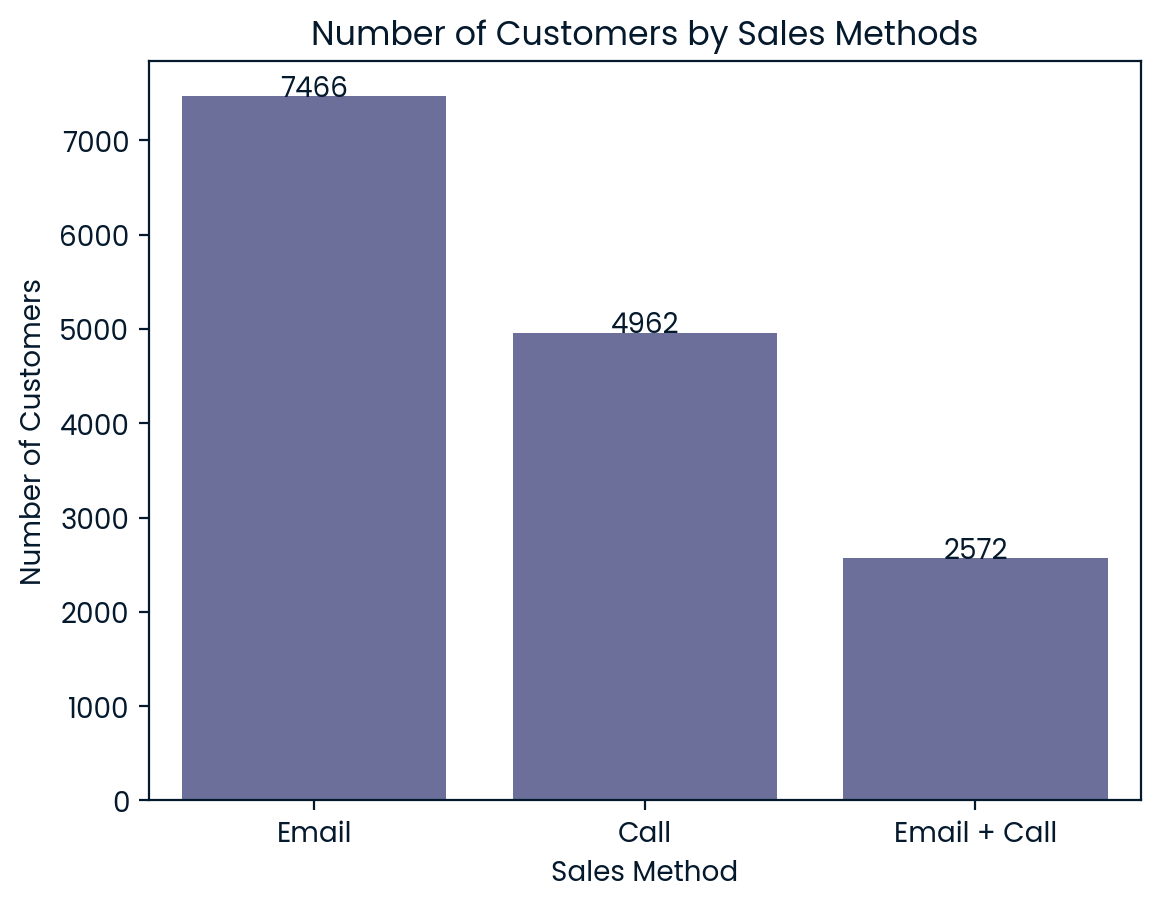

In [19]:
# Plot Number of Customers by Sales Methods

ax = sns.barplot(x=num_cust_by_sales_method.index, y=num_cust_by_sales_method.values)

plt.title('Number of Customers by Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')

# Add value label for each bar plot
for i, v in enumerate(num_cust_by_sales_method.values):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.show()

## The Distribution of Revenues by Overall and Sales Method

Following six weeks' sales periods for the new product line, it shows that most customers spend between **50 USD** and **100 USD**, and there are some customers who spend more than **150 USD**. Following that, the revenue distribution shows that **Email + Call** methods generated the most revenue, exceeding **150 USD**, followed by **Email** with revenue approximately between **70 USD** and **130 USD**, and the Call method generated the least revenue, approximately **50 USD**.

### The Distribution of Revenue by Overall

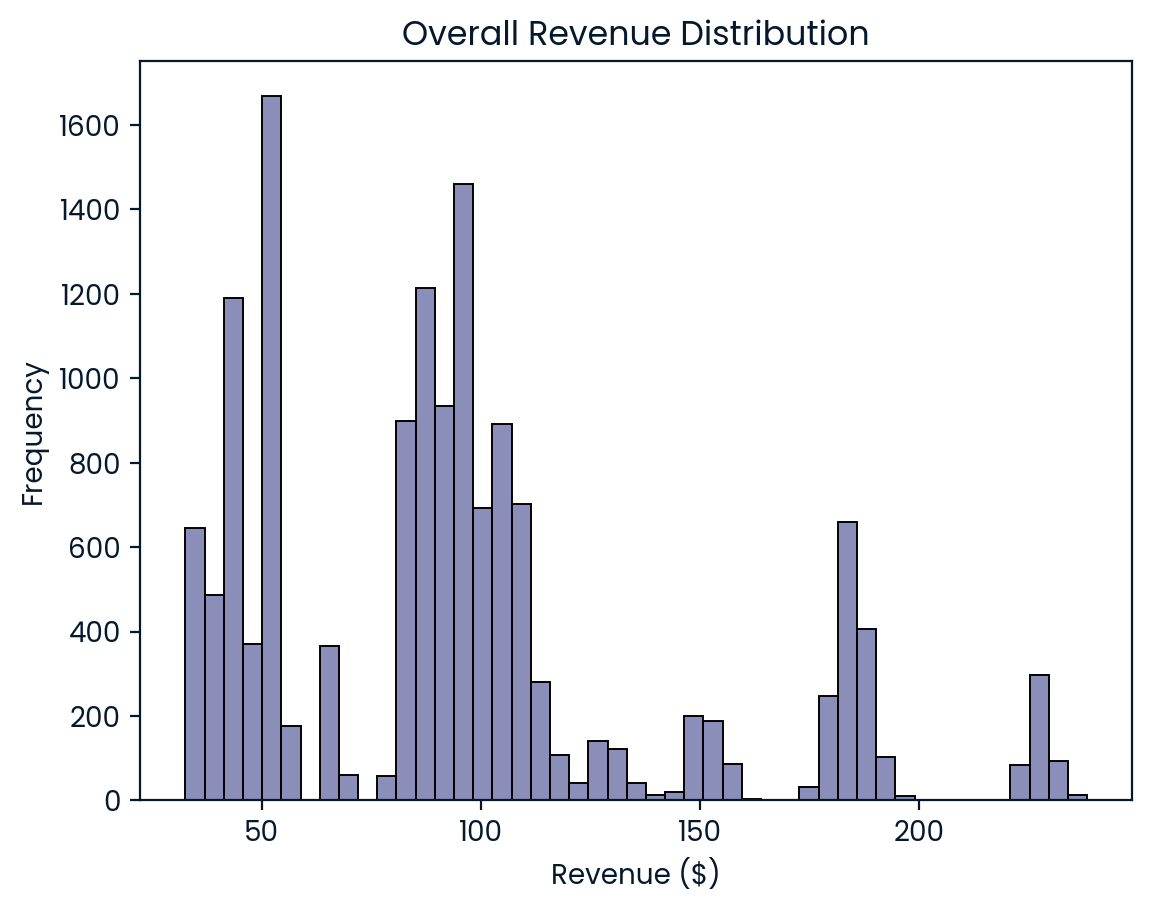

In [20]:
sns.histplot(x='revenue', data=sales)
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.title('Overall Revenue Distribution')
plt.show()

### The Revenue Distribution by Sales Methods

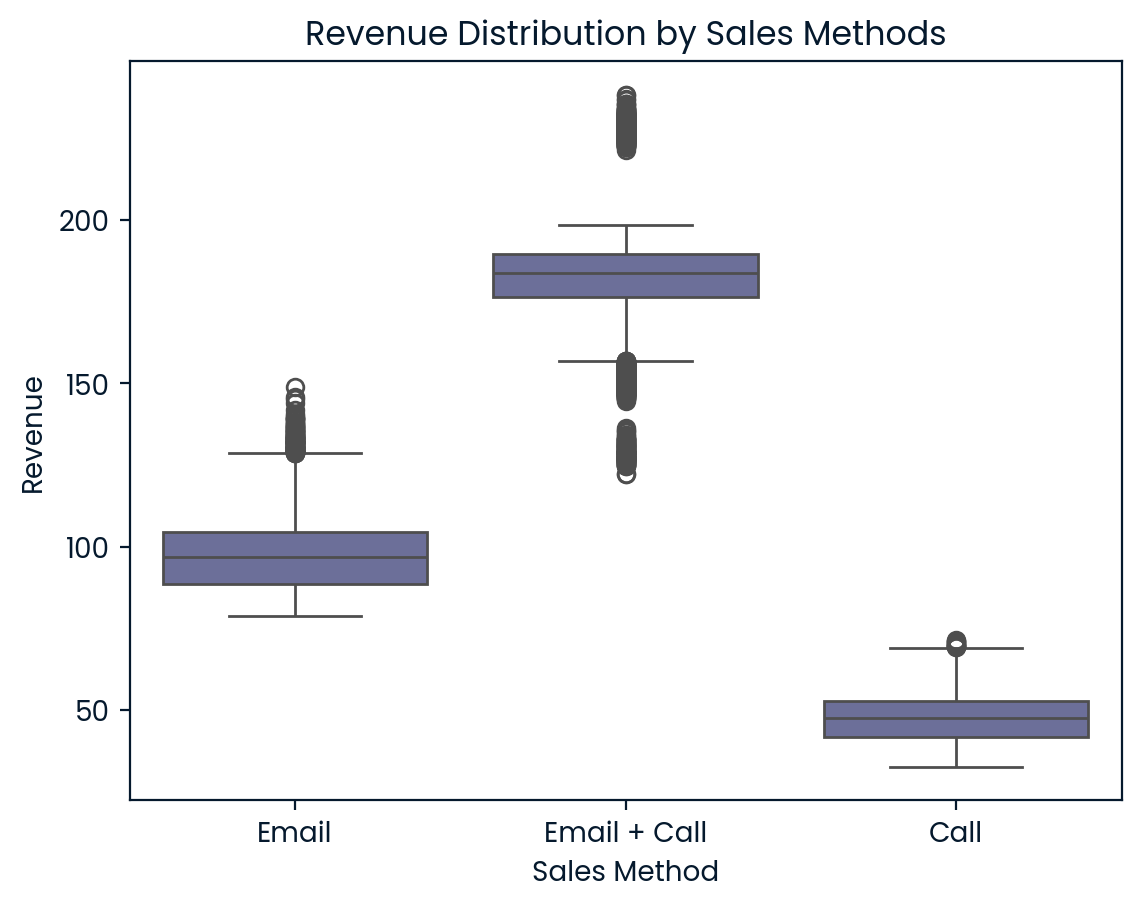

In [21]:
sns.boxplot(x='sales_method', y='revenue', data=sales)
plt.title('Revenue Distribution by Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

## Revenue over Time by Sales Method

In week 1, the **Email** sales method generated the highest revenue, followed by **Email + Call**, and **Call**. However, it is important to note that the **Email** method required the least effort from the sales team, making it the most efficient method during the first week. Over the 6 weeks, sales generated from the Email sales method consistently decreased. This decline in revenue over time could indicate diminishing returns from the Email sales method as time goes on. The call method shows an overall increasing trend in revenue over time with some fluctuations. Towards the end of the 6 weeks, the amount of revenue generated from the **Call** method began to decrease. The **Email + Call** method shows a healthy increasing trend of revenue over the 6 weeks. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods.

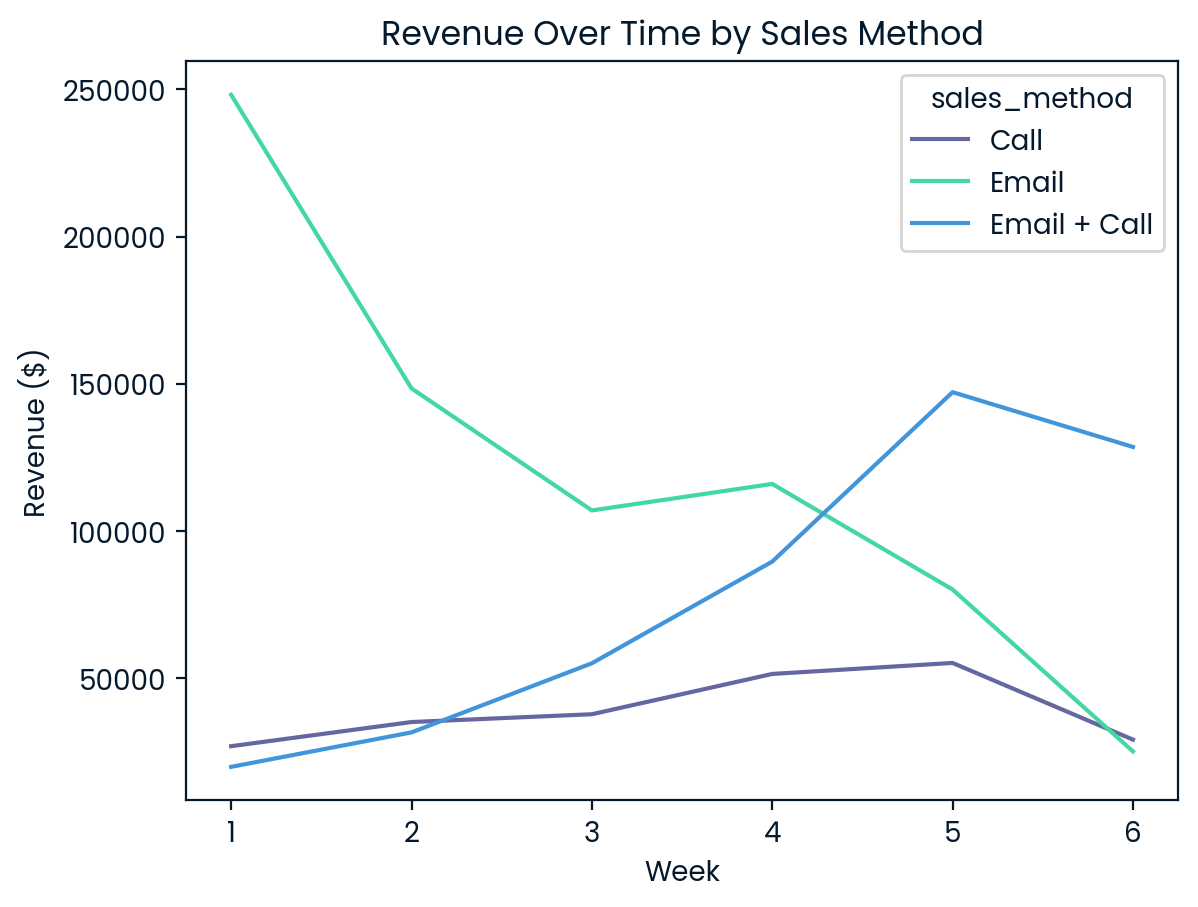

In [22]:
revenue_over_time = sales.groupby(['week', 'sales_method'])['revenue'].sum()

# Create Plot A Revenue Over Time By Sales Method
revenue_over_time.unstack().plot()
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue ($)')
plt.show()

## Distribution of Number of Products Sold by Sales Methods

The **Email + Call** sales method saw an average of 12 sales per customer compared to 10 average sales for the **Call** and **Email** methods. The majority of customers using the **Email + Call** method bought **10-13** items compared to **8-11** and **9-11** for the Email and Call methods. This could suggest that customers who are engaged via the Email + Call sales method are more likely to buy a higher volume of items and therefore increase revenue.

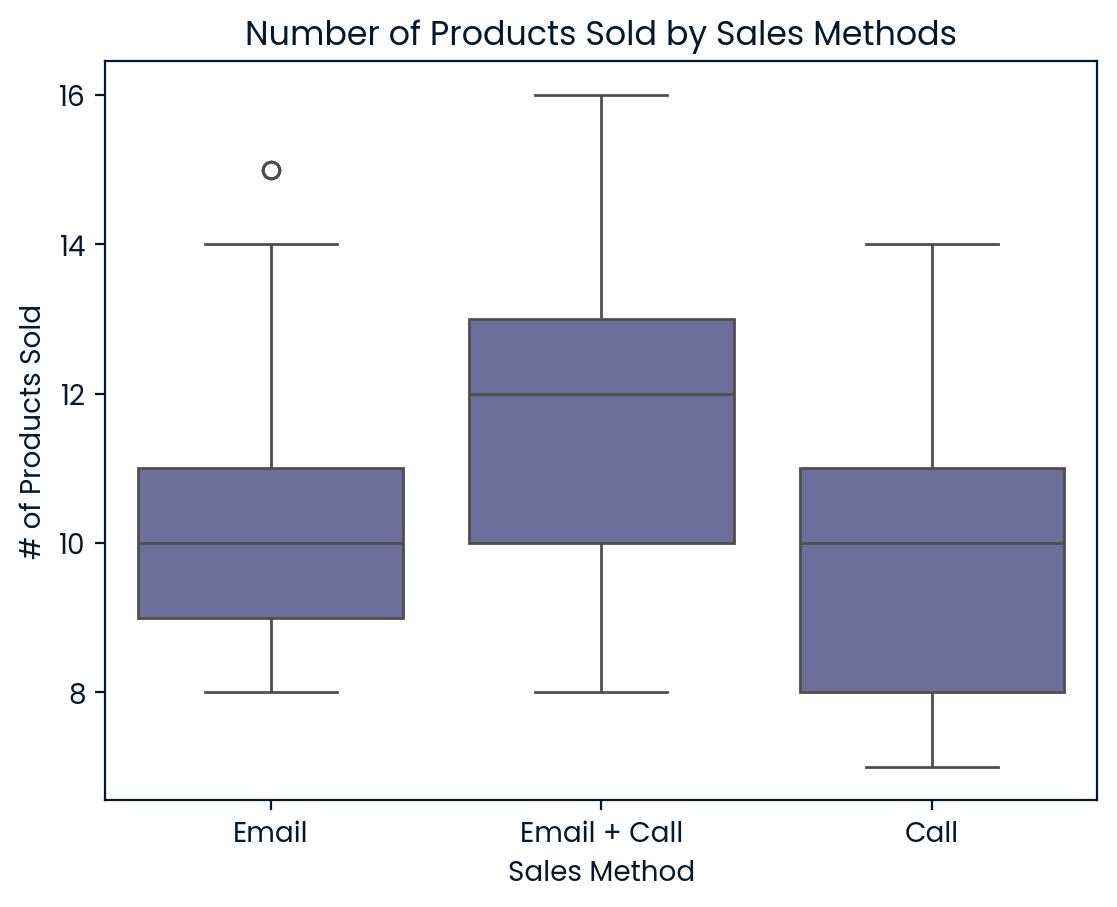

In [23]:
sns.boxplot(x='sales_method', y='nb_sold', data=sales)
plt.title('Number of Products Sold by Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('# of Products Sold')
plt.show()

# Business Metrics

Based on our last six weeks of data, the revenue generated from the **Email + Call** sales method shows positive trends that can be considered for our new product line. To determine the most effective sales method for our new product line, we recommend using the average revenue generated by each method during the first six weeks as our metric.

## Average Revenue per Customer by Sales Method Over Time

The average revenue trend shows an upward trend for all sales methods from week 1 to week 6. **Email + Call** generated the **largest average revenue** (135 USD - 220 USD) for all weeks, while **Call** generated the **least average revenue** (35 USD - 65 USD). Since we are using average revenue per customer as our metric, we can consider the Email + Call method to be prioritised as the method for our new product's future sales following positive trends since it has been generated highest average revenue from week 1.

In [24]:
avg_revenue_cust_time = sales.groupby(['week', 'sales_method']).agg({'revenue':'sum', 
                                                                                'customer_id' :'count'}).reset_index()

avg_revenue_cust_time['avg_revenue_by_customer'] = avg_revenue_cust_time['revenue']/avg_revenue_cust_time['customer_id']

avg_revenue_cust_time

,week,sales_method,revenue,customer_id,avg_revenue_by_customer
0,1,Call,27015.934407,758,35.641074
1,1,Email,248122.682313,2815,88.143049
2,1,Email + Call,20007.400954,148,135.185142
3,2,Call,35219.944012,805,43.751483
4,2,Email,148478.487577,1486,99.918229
5,2,Email + Call,31702.115744,200,158.510579
6,3,Call,37865.583880,902,41.979583
7,3,Email,107047.993157,1150,93.085211
8,3,Email + Call,55164.933140,359,153.662766
9,4,Call,51545.486149,1005,51.289041


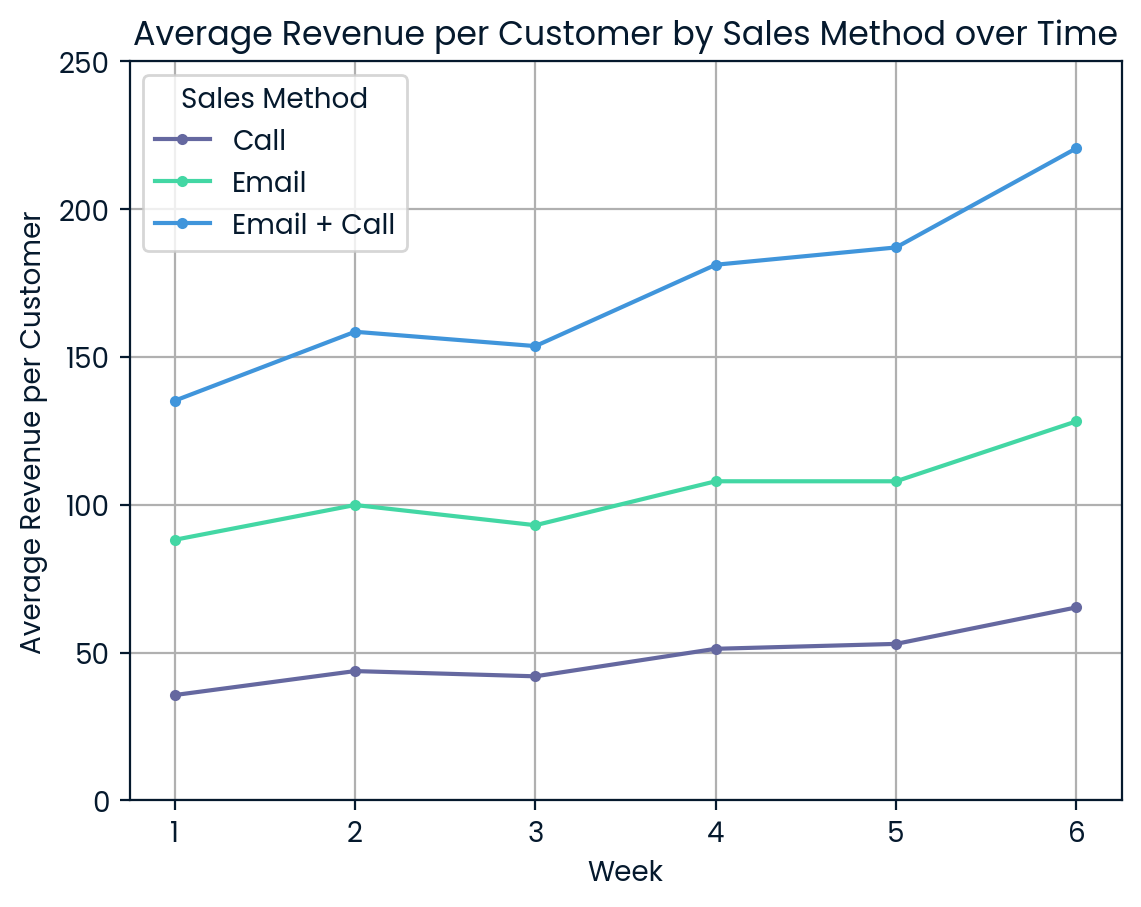

In [25]:
# Plot Average Revenue per Customers By Sales Method
pivot = avg_revenue_cust_time.pivot_table(index='week', columns='sales_method', values='avg_revenue_by_customer')
pivot

pivot.plot(kind='line', marker='.')
plt.xlabel('Week')
plt.ylabel('Average Revenue per Customer')
plt.title('Average Revenue per Customer by Sales Method over Time')
plt.legend(title='Sales Method')
plt.grid()
plt.ylim(0, 250)
plt.show()

# Recommendation

- Based on the recent six-week sales method performance and its impact on revenue, we recommend that the **Email + Call** sales method be prioritised for our new product line. This is evidenced by the number of products sold and the highest revenue achieved.
- The **Email + Call** campaign demonstrated a positive trend in revenue generation over six weeks, indicating its potential for continued success.